Populating the interactive namespace from numpy and matplotlib


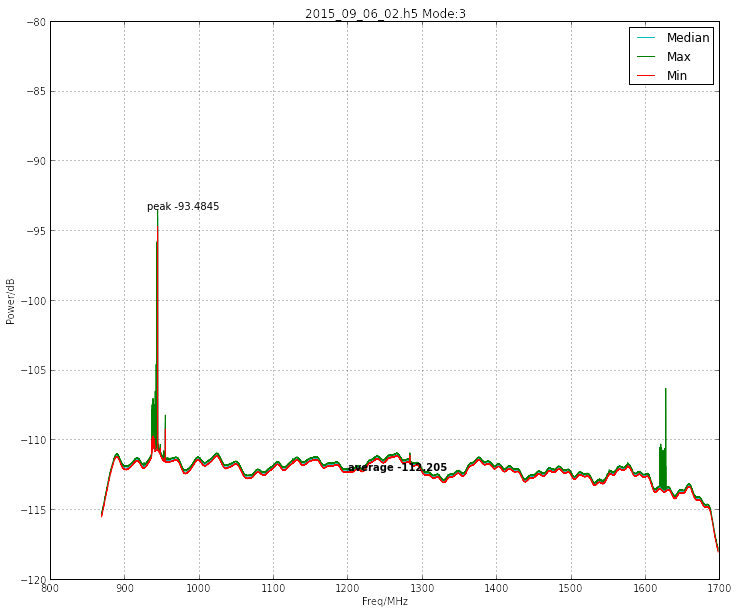

In [1]:
# %load /home/tony/Desktop/RFI/plotspec.py
#!/usr/bin/env python
import h5py
import pylab as pl
import numpy as np
import urllib

%pylab inline
"""
get h5 file from server
02 SAST every time
read in spectra and mode
plot with information
"""
def freq(chans,mode):
    if mode==4:
        freq=1800000000.0 +chans*27465.8203125
    if mode ==3:
        freq = 855000000.0 +chans*26092.529296875
    if mode ==2:
        freq= 600000000.0 + chans*18310.546875
    if mode ==1:
        freq=0+chans*27465.8203125
    return freq/1e6


yr="2015"
mon="09"
day="06"
hr="02"
tstr=yr+"/"+mon+"/"+day+"/"+hr+".h5"
filename=yr+"_"+mon+"_"+day+"_"+hr+".h5"


url="http://rfimonitor.kat.ac.za/rfi_data/"+tstr
urllib.urlretrieve(url,filename)

x=h5py.File(filename,'r')
#x.keys()
l=x['spectra']
m=x['mode']



fchans=np.array(range(l.shape[1]))
times=l.shape[0]

tf=np.bool()  # boolean array
marr=np.array(m) # array for modes
ll=np.array(l) # array for spectra
tf=marr > 0 # true if value >0
mode=max(marr)
sp=ll[tf]
f=freq(fchans,mode)

mod=np.median(sp,axis=0)
maxim=np.max(sp,axis=0)
minim=np.min(sp,axis=0)
pk=np.max(maxim[500:-500]) # peak
chpk=np.argmax(maxim[500:-500]) # channel with peak
fpk=freq(chpk,mode) # freq of channel with peak

aver=np.average(mod[500:-500])

pl.figure(figsize=(12,10))
pl.plot(f[500:-500],mod[500:-500],label="Median",color='c')
pl.plot(f[500:-500],maxim[500:-500],label="Max", color='g')
pl.plot(f[500:-500],minim[500:-500],label="Min",color='r')

pl.ylim(-120,-80)
pl.title(filename+" Mode:"+str(mode))
pl.xlabel("Freq/MHz")
pl.ylabel("Power/dB")
pl.text(fpk,pk,"peak "+str(pk))
pl.text(1200,aver,"average "+str(aver),fontsize=10,color='k', weight='bold')
pl.legend()
pl.grid(True)
pl.show()



In [2]:
import os
os.remove(filename)